In [3]:
import pandas as pd, sqlite3

# Ex03. Столбчатые диаграммы

## 1. Подключение к базе данных

In [4]:
conn = sqlite3.connect("../data/checking-logs.sqlite")

## 2. График коммитов студентов по часам в выходные и будние дни

In [5]:
commits = pd.read_sql('''
    SELECT CAST(strftime('%u', timestamp) AS INTEGER) day,
           CAST(strftime('%H', timestamp) AS INTEGER) hour,
           date(timestamp) AS date,
           COUNT(*) AS count
    FROM checker
    WHERE uid LIKE 'user_%'
    GROUP BY day, date, hour
''', conn)

In [6]:
work = commits[commits.day < 6]
weekend = commits[commits.day >= 6]

commits_work_day = work.groupby('hour')['count'].mean()
commits_weekend = weekend.groupby('hour')['count'].mean()

In [8]:
c = (pd.merge(commits_weekend, commits_work_day, on='hour')
    .rename(columns = {'count_x': 'weekend', 
                       'count_y': 'working_day'})
    .reindex(range(24), fill_value=0))

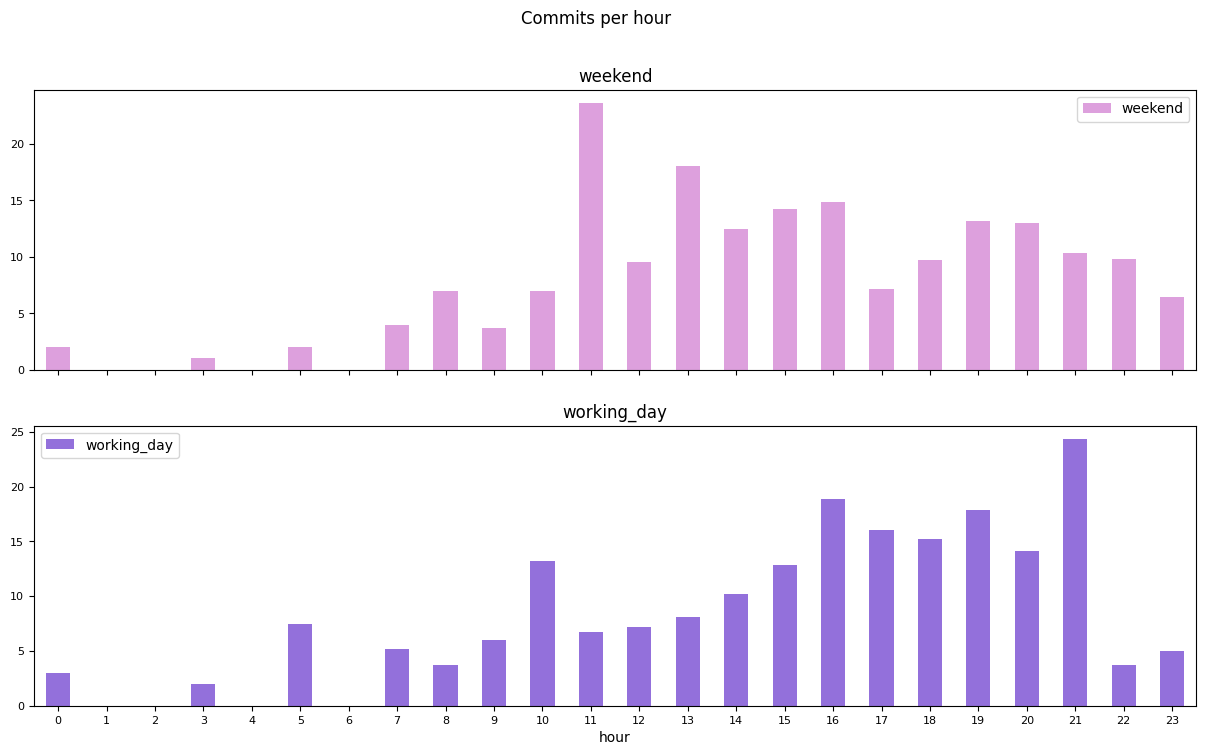

In [9]:
ax1, ax2 = c.plot(kind='bar',
                subplots=True, 
                fontsize=8, 
                figsize=(15, 8), 
                legend=[['weekend'], ['workind day']], 
                rot=0, 
                color=['plum', 'mediumpurple'],
                title='Commits per hour')

**Отличается ли динамика в рабочие и выходные дни?**\
Ответ: \
*максимальный час в будни    21\
максимальный час в выходные 11*

In [12]:
commits_work_day

hour
0      3.000000
3      2.000000
5      7.500000
6      1.500000
7      5.166667
8      3.700000
9      6.000000
10    13.200000
11     6.769231
12     7.181818
13     8.111111
14    10.166667
15    12.818182
16    18.888889
17    16.000000
18    15.181818
19    17.833333
20    14.076923
21    24.333333
22     3.750000
23     5.000000
Name: count, dtype: float64

In [13]:
commits_weekend

hour
0      2.000000
1      6.000000
3      1.000000
5      2.000000
7      4.000000
8      7.000000
9      3.666667
10     7.000000
11    23.600000
12     9.500000
13    18.000000
14    12.428571
15    14.250000
16    14.800000
17     7.142857
18     9.714286
19    13.125000
20    13.000000
21    10.285714
22     9.833333
23     6.400000
Name: count, dtype: float64

## 3. Закрытие соединения

In [10]:
conn.close()